In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [14]:
df = pd.read_csv('houseprices.csv')
df

,area,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900
5,1985,299900
6,1534,314900
7,1427,198999
8,1380,212000
9,1494,242500


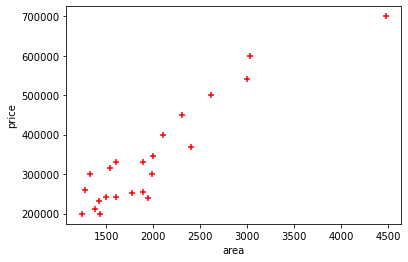

In [15]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price, color='red', marker='+') #plotting size in square feet and their respective price


In [16]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2104
1,1600
2,2400
3,1416
4,3000
5,1985
6,1534
7,1427
8,1380
9,1494


In [17]:
price = df.price
price

0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
Name: price, dtype: int64

In [18]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [19]:
reg.predict([[1900]]) #predict price of a home with 1900 sqft

array([325459.69462618])

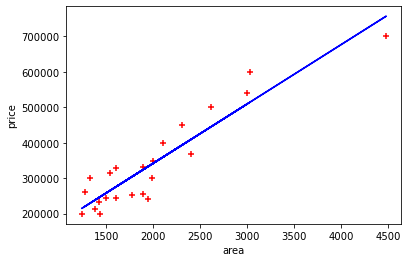

In [22]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [23]:
reg.coef_

array([167.28666849])

In [24]:
reg.intercept_

7615.0244912470225

In [25]:
#Y = m * X + b (m is coefficient and b is intercept)
1900*167.28666849 + 7615.0244912470225

325459.694622247

# #Find prices of different areas stored in csv and return prices in csv

In [26]:
d = pd.read_csv('area.csv')
d.head(5)

,area
0,1604
1,1962
2,3890
3,1100
4,1458


In [27]:
p= reg.predict(d)
d['prices'] = p
d.to_csv('prediction.csv')